In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Encode Label (necessario per alcuni modelli)
class_mapping = {'setosa': 0,
                'versicolor': 1,
                'virginica': 2
                }

df['species']= df['species'].map(class_mapping)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#df.iloc[:,0:-1].to_excel('input_df.xlsx',index=False)

In [5]:
target = 'species'
X = df.drop([target], axis=1) # matrice Features
y = df[target]

In [6]:
scaler = StandardScaler()

classifier = RandomForestClassifier(bootstrap=True,
                                    max_depth=4,
                                    max_features=2,
                                    min_samples_leaf=3,
                                    min_samples_split=8,
                                    n_estimators=100,
                                    )

In [7]:
model_pipe = Pipeline([
                        ('Scaling and standardize data', scaler),
                        ('Classifier', classifier)
                        ])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



Text(0.5, 1.0, 'Confusion Matrix')

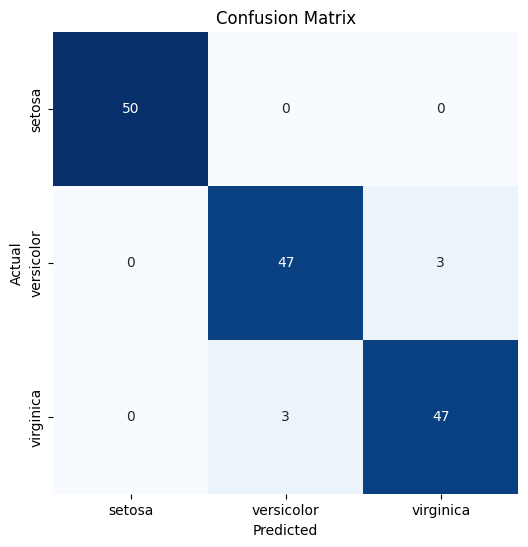

In [8]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix

labels = list(class_mapping.keys())
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=667)
y_pred = cross_val_predict(model_pipe, X, y, cv=cv)

report = classification_report(y, y_pred)
print(report)

conf_matrix = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [9]:
model_pipe.fit(X, y)

Pipeline(steps=[('Scaling and standardize data', StandardScaler()),
                ('Classifier',
                 RandomForestClassifier(max_depth=4, max_features=2,
                                        min_samples_leaf=3,
                                        min_samples_split=8))])

In [10]:
import joblib

joblib.dump(model_pipe,'iris_pipe.pkl')

['iris_pipe.pkl']

In [11]:
loaded_model = joblib.load('iris_pipe.pkl')
loaded_model

Pipeline(steps=[('Scaling and standardize data', StandardScaler()),
                ('Classifier',
                 RandomForestClassifier(max_depth=4, max_features=2,
                                        min_samples_leaf=3,
                                        min_samples_split=8))])

In [15]:
sepal_lenght = 2.5
sepal_width =  2.5
petal_lenght =  0.5
petal_width =  0.5

data = {
            "sepal_length": [sepal_lenght],
            "sepal_width": [sepal_width],
            "petal_length": [petal_lenght],
            "petal_width": [petal_width],
            }

input_df = pd.DataFrame(data)
res = loaded_model.predict(input_df).astype(int)[0]
print(res)

classes = {0:'setosa',
           1:'versicolor',
           2:'virginica',
           }
y_pred = classes[res]
y_pred

0


'setosa'